In [35]:
import numpy as np
import mikeio

## Plot 3D, barotropic slices (velocities only)

In [36]:
filename = "./3D_FMSW/3D_FMSW_barotropic_largerWC/proj.mfm"+" "+"-"+" "+"Result Files"+"/vert_slice_lat43P6.dfsu"
dfs = mikeio.open(filename)
dfs

<mikeio.Dfsu2DV>number of nodes: 2745
number of elements: 2507
projection: LONG/LAT
number of sigma layers: 10
max number of z layers: 8
items:
  0:  U velocity <u velocity component> (meter per sec)
  1:  V velocity <v velocity component> (meter per sec)
  2:  W velocity <w velocity component> (meter per sec)
time: 2019-10-29 23:00:00 - 2019-11-03 00:00:00 (98 records)

In [37]:
# plot velocity slice
da_u = dfs.read(items="U velocity")[0]
# da_u**2.0
da_v = dfs.read(items="V velocity")[0]
da_w = dfs.read(items="W velocity")[0]
da_mag = (da_u**2.0+da_v**2.0+da_w**2.0)**(0.50)

In [38]:
da_mag

<mikeio.DataArray>
name: U velocity + V velocity + W velocity
dims: (time:98, element:2507)
time: 2019-10-29 23:00:00 - 2019-11-03 00:00:00 (98 records)
geometry: Flexible Mesh Geometry: DfsuVerticalProfileSigmaZ
number of nodes: 2745
number of elements: 2507
number of layers: 18
number of sigma layers: 10
projection: LONG/LAT

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2674022815.py:13: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(cmin=-0.2, cmax=0.3, levels=19, plot_type='shaded', cmap='Blues', figsize=(12.8,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-10-29-23-00_vmag-slice.jpeg");


<Figure size 3840x2880 with 0 Axes>

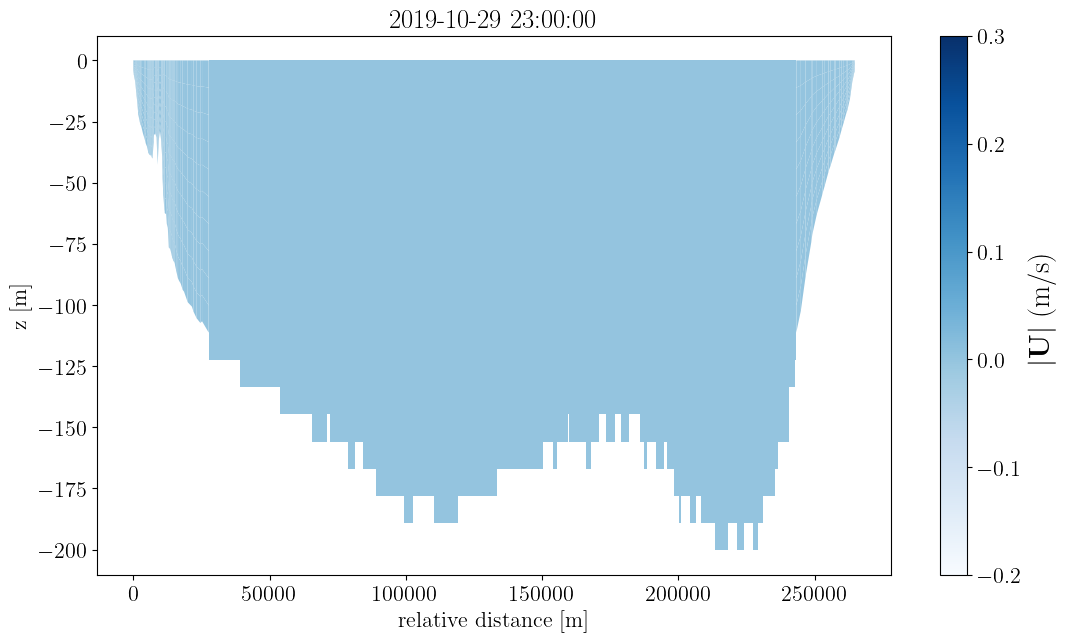

In [39]:
import matplotlib.pyplot as plt
import cmocean
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)
plt.rcParams['text.usetex'] = True

vmag = da_mag[0]

vmag.plot(cmin=-0.2, cmax=0.3, levels=19, plot_type='shaded', cmap='Blues', figsize=(12.8,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-10-29-23-00_vmag-slice.jpeg");

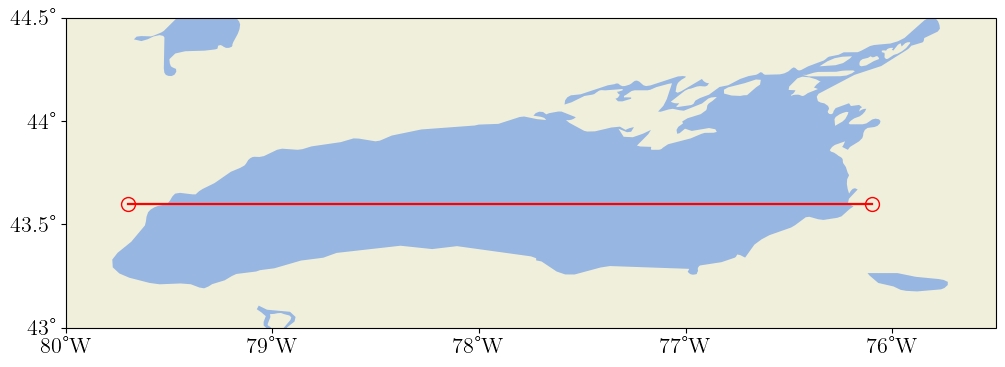

In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat
import pandas as pd
import geopandas as gpd
import xarray as xr
import numpy as np
from cartopy.mpl.ticker import LongitudeFormatter,LatitudeFormatter
# from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.image import imread
from cartopy.io.shapereader import Reader
import matplotlib as mpl
from cartopy.feature import ShapelyFeature
import shapely.vectorized
import netCDF4 as netcdf

# plot shape file of Lake Ontario
proj = ccrs.PlateCarree()
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111,projection=proj)

ax.set_extent([-75.5,-80,43,44.5],crs=ccrs.PlateCarree())
ax.set_xticks(np.arange(-80,-76+1,1.0))
ax.set_yticks(np.arange(43,44.5+0.5,0.5))
# not showing NSEW
cardinal_labels = {"east": "", "west": "W", "north": "", "south": ""}
lon_formatter = LongitudeFormatter(zero_direction_label=True, cardinal_labels=cardinal_labels)
lat_formatter = LatitudeFormatter(cardinal_labels=cardinal_labels)
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(plt.MultipleLocator(1))

ax.coastlines()
ax.add_feature(cfeat.LAND.with_scale('10m'), zorder=1)
ax.add_feature(cfeat.LAKES.with_scale('10m'), zorder=1)

# path 1
lonTC = np.array([-79.7, -76.1])
latTC = 43.6*np.ones(2)
lonTC2 = -78.5*np.ones(5)
latTC2 = np.array([43.2, 43.5, 43.8, 44.0, 44.3])
for i in range(1, len(lonTC)):
    ax.plot((lonTC[i-1], lonTC[i]), (latTC[i-1], latTC[i]), color='r', lw=1.60, marker="o", markersize=10, fillstyle='none')

fig.savefig('slice.jpeg', dpi=600)

<>:13: SyntaxWarning: invalid escape sequence '\h'
<>:13: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2798037335.py:13: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-1-00-00_vmag-slice.jpeg");


<Figure size 3840x2880 with 0 Axes>

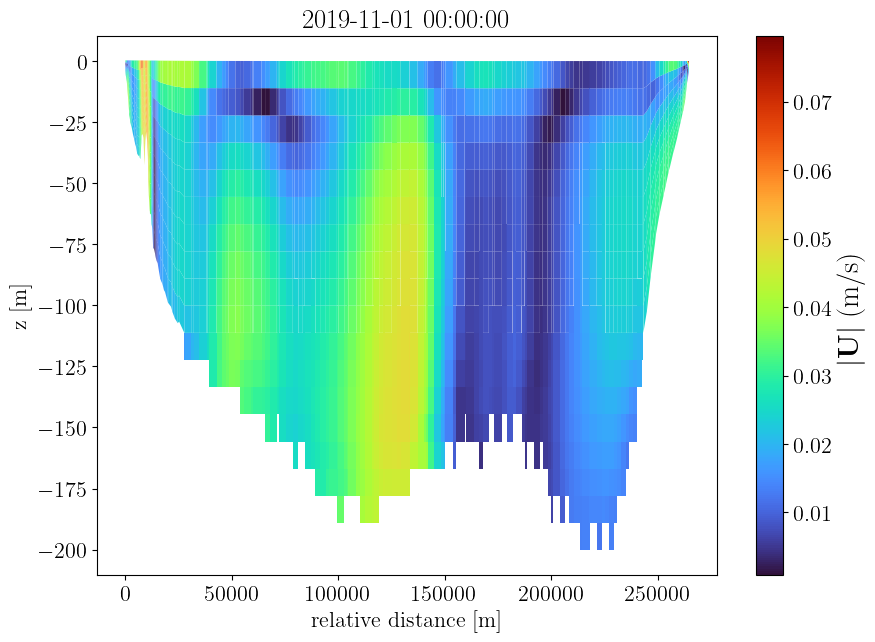

In [41]:
import matplotlib.pyplot as plt
import cmocean
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)
plt.rcParams['text.usetex'] = True

vmag = da_mag[49]

vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-1-00-00_vmag-slice.jpeg");

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\3977997783.py:3: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-1-12-00_vmag-slice.jpeg");


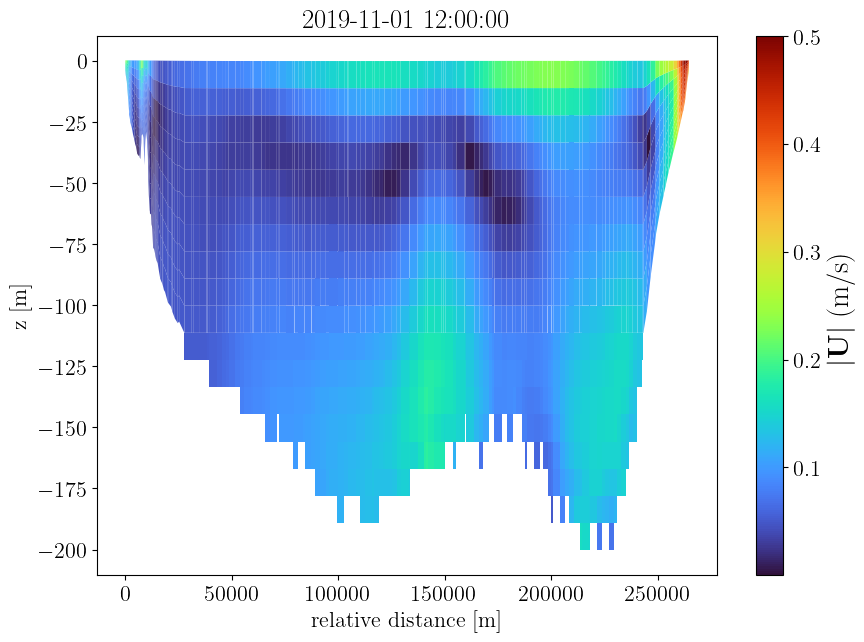

In [42]:
vmag = da_mag[61]

vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-1-12-00_vmag-slice.jpeg");

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2313502138.py:3: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-2-00-00_vmag-slice.jpeg");


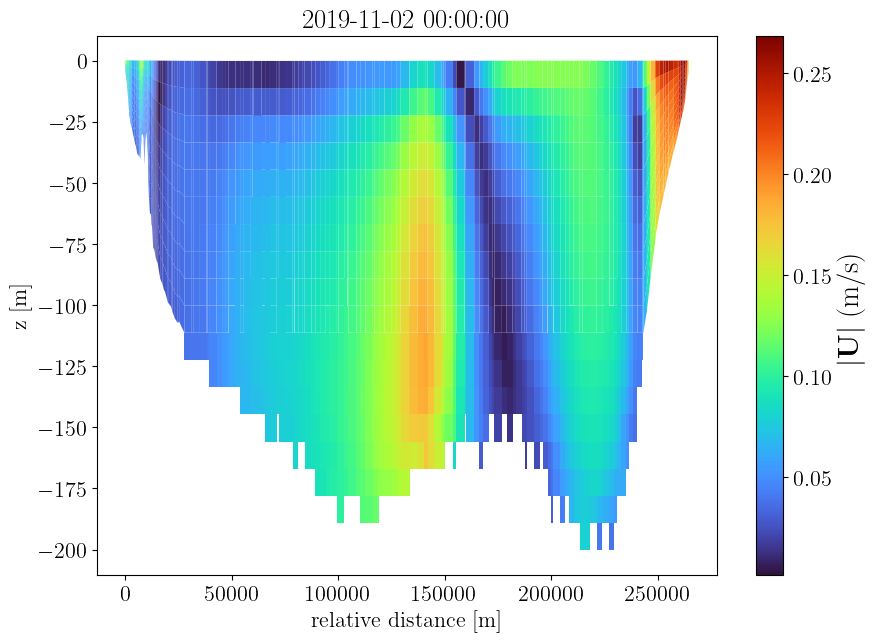

In [43]:
vmag = da_mag[73]

vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-2-00-00_vmag-slice.jpeg");

<>:3: SyntaxWarning: invalid escape sequence '\h'
<>:3: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2418128985.py:3: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-2-12-00_vmag-slice.jpeg");


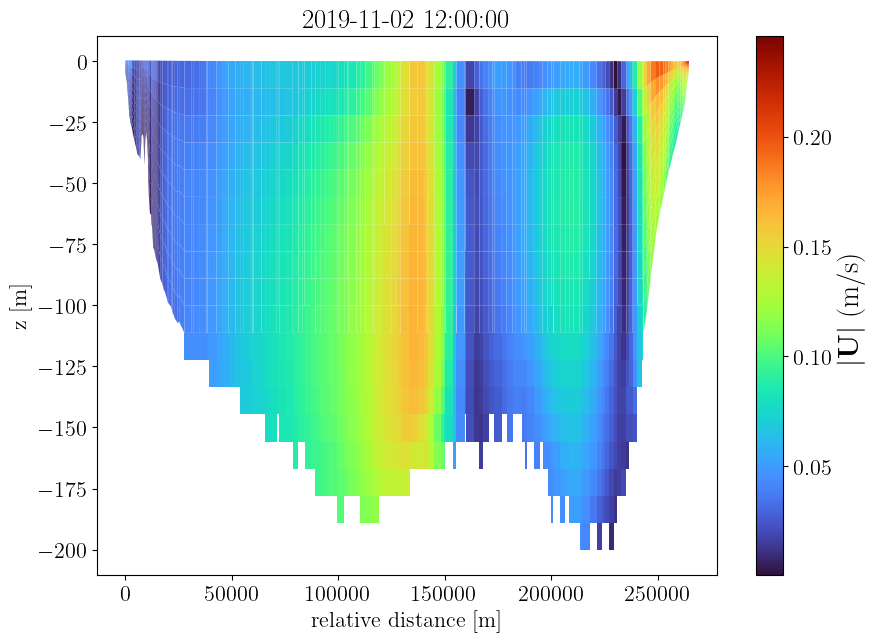

In [44]:
vmag = da_mag[85]

vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_FMSW_barotropic_largerWC_ro/2019-11-2-12-00_vmag-slice.jpeg");

## Plot 3D baroclinc slices (velocities and $T$)

In [45]:
filename = "./3D_FMSW/3D_baroclinic_FMSW_largerWC/proj.mfm"+" "+"-"+" "+"Result Files"+"/vertSlice_lat43P6.dfsu"
dfs = mikeio.open(filename)
dfs

<mikeio.Dfsu2DV>number of nodes: 2745
number of elements: 2507
projection: LONG/LAT
number of sigma layers: 10
max number of z layers: 8
items:
  0:  U velocity <u velocity component> (meter per sec)
  1:  V velocity <v velocity component> (meter per sec)
  2:  W velocity <w velocity component> (meter per sec)
  3:  Density <Density> (kg per meter pow 3)
  4:  Temperature <Temperature> (degree Celsius)
time: 2019-10-29 23:00:00 - 2019-11-03 00:00:00 (98 records)

In [46]:
# plot velocity slice
da_u = dfs.read(items="U velocity")[0]
# da_u**2.0
da_v = dfs.read(items="V velocity")[0]
da_w = dfs.read(items="W velocity")[0]
da_mag = (da_u**2.0+da_v**2.0+da_w**2.0)**(0.50)

<>:11: SyntaxWarning: invalid escape sequence '\h'
<>:11: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\1239875159.py:11: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-00-00_vmag-slice.jpeg");


<Figure size 3840x2880 with 0 Axes>

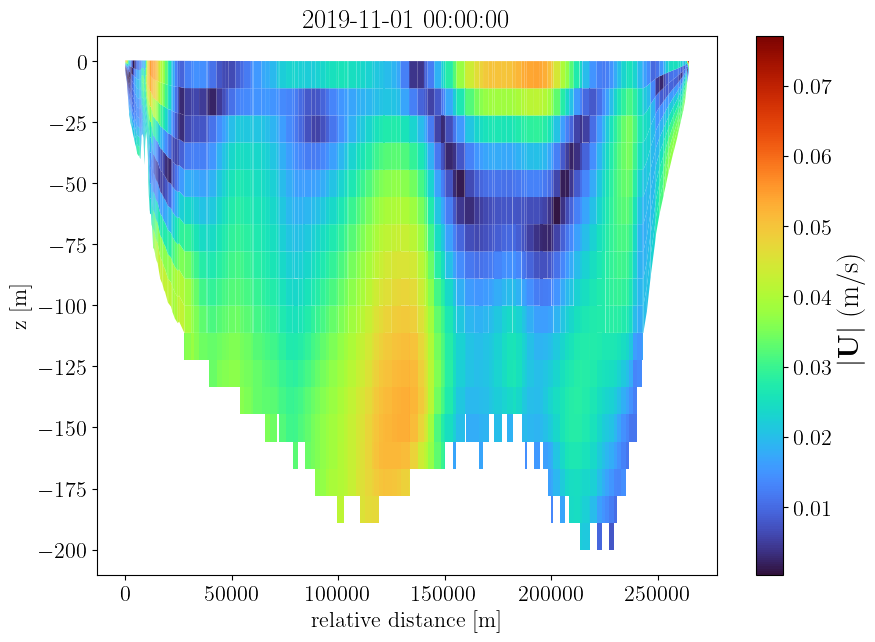

In [47]:
# Set font properties globally
plt.rcParams['font.family'] = "Times New Roman"
# Set font properties globally
plt.rcParams['font.size'] = 16
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi=600)
plt.rcParams['text.usetex'] = True

vmag = da_mag[49]

vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-00-00_vmag-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\655277728.py:2: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-12-00_vmag-slice.jpeg");


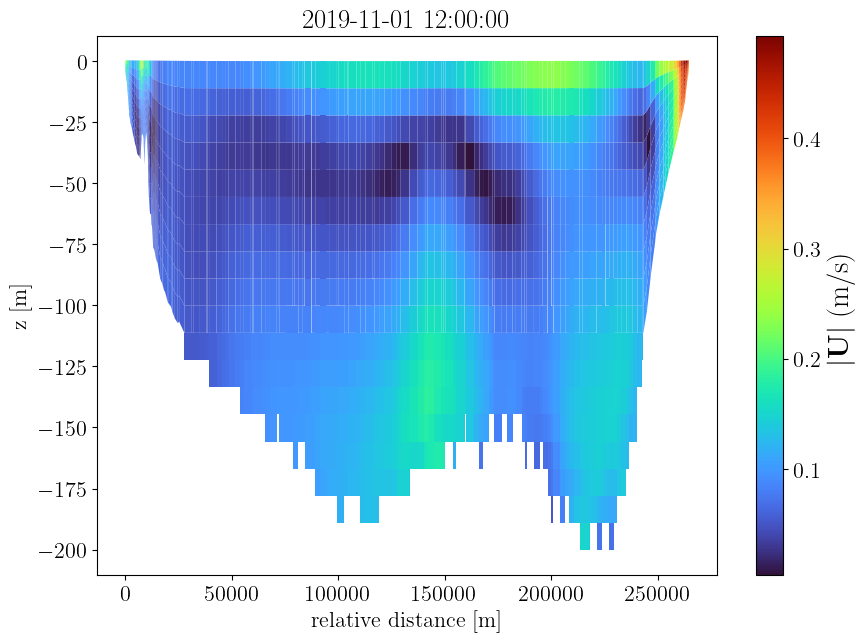

In [48]:
vmag = da_mag[61]
vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-12-00_vmag-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2850096310.py:2: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-00-00_vmag-slice.jpeg");


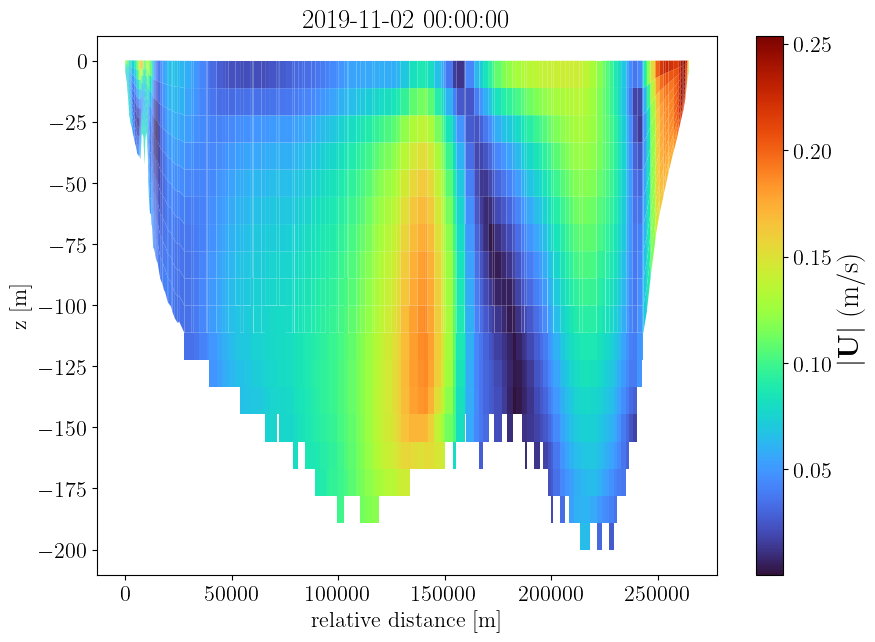

In [49]:
vmag = da_mag[73]
vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-00-00_vmag-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\987353393.py:2: SyntaxWarning: invalid escape sequence '\h'
  vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-12-00_vmag-slice.jpeg");


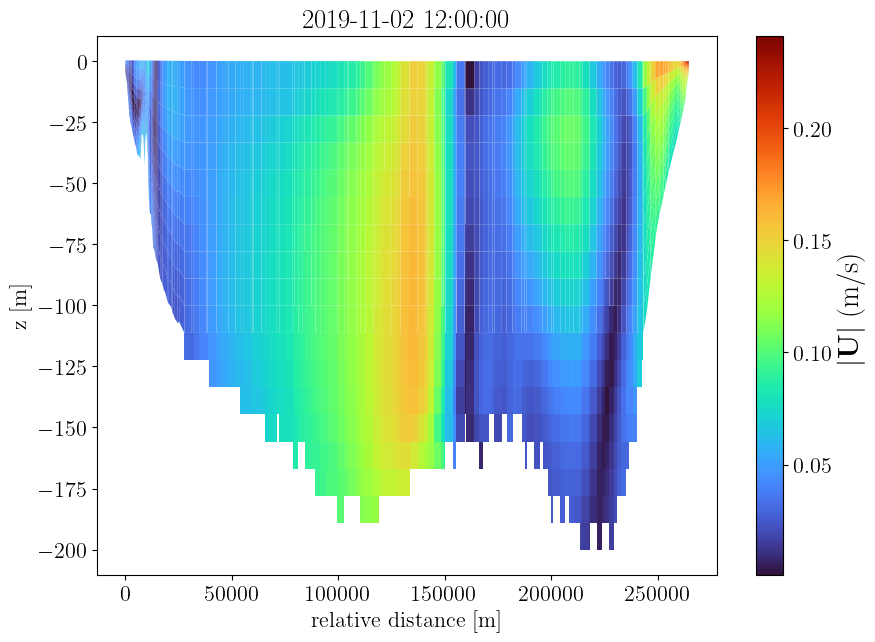

In [50]:
vmag = da_mag[85]
vmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='turbo', figsize=(10,7), label='\huge $|\mathbf{U}|$ (m/s)', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-12-00_vmag-slice.jpeg");

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\3621728187.py:5: SyntaxWarning: invalid escape sequence '\h'
  tmag.plot(cmin=0.0, cmax=12.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-10-29-23-00_T-slice.jpeg");


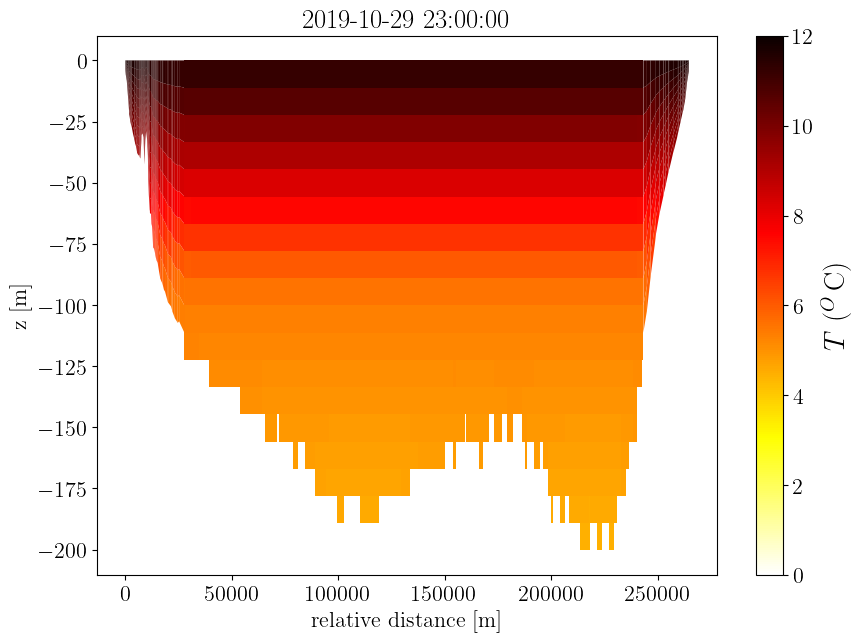

In [55]:
## Plotting the temperature profiles
da_t = dfs.read(items="Temperature")[0]

tmag = da_t[0]
tmag.plot(cmin=0.0, cmax=12.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-10-29-23-00_T-slice.jpeg");

<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\143701368.py:5: SyntaxWarning: invalid escape sequence '\h'
  tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-00-00_T-slice.jpeg");


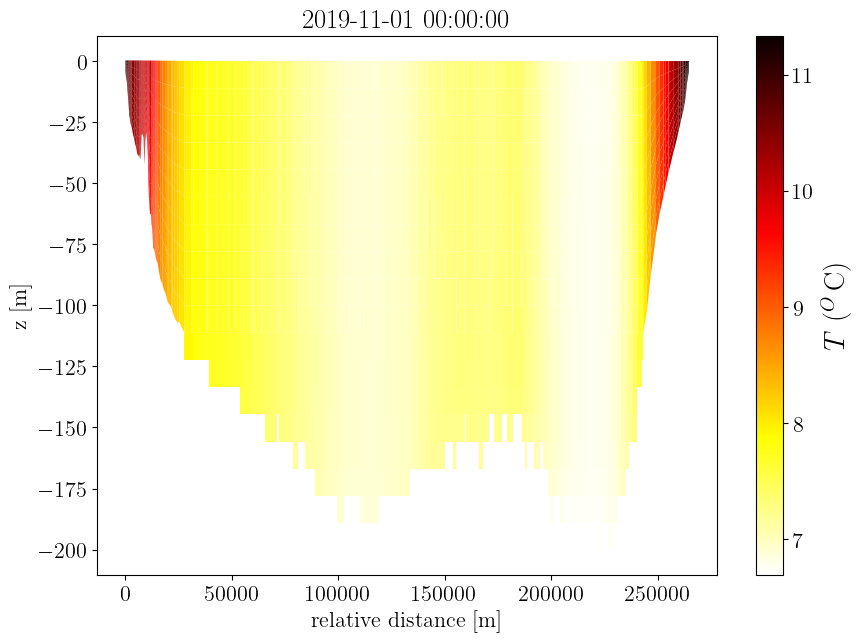

In [51]:
## Plotting the temperature profiles
da_t = dfs.read(items="Temperature")[0]

tmag = da_t[49]
tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-00-00_T-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2934359153.py:2: SyntaxWarning: invalid escape sequence '\h'
  tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-12-00_T-slice.jpeg");


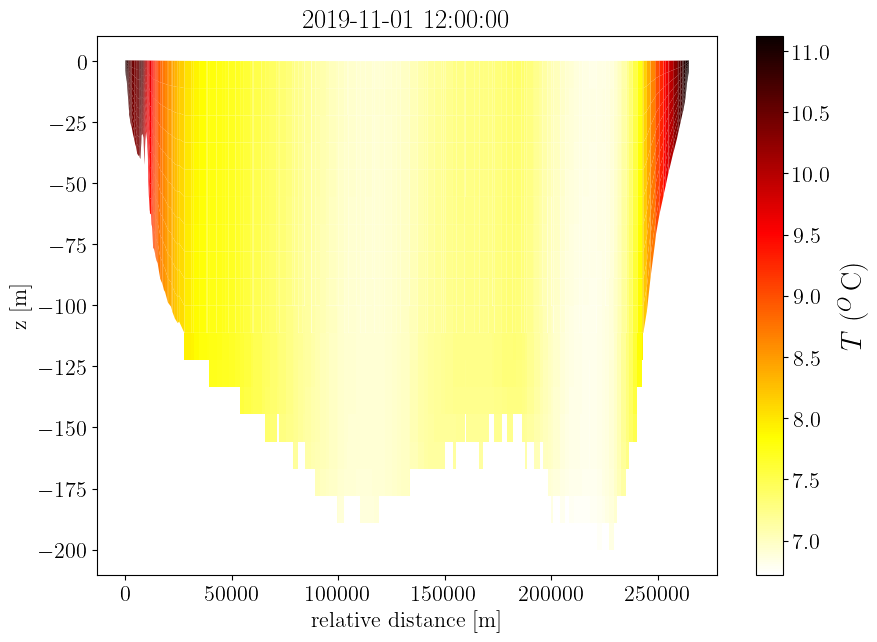

In [52]:
tmag = da_t[61]
tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-1-12-00_T-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\2002032435.py:2: SyntaxWarning: invalid escape sequence '\h'
  tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-00-00_T-slice.jpeg");


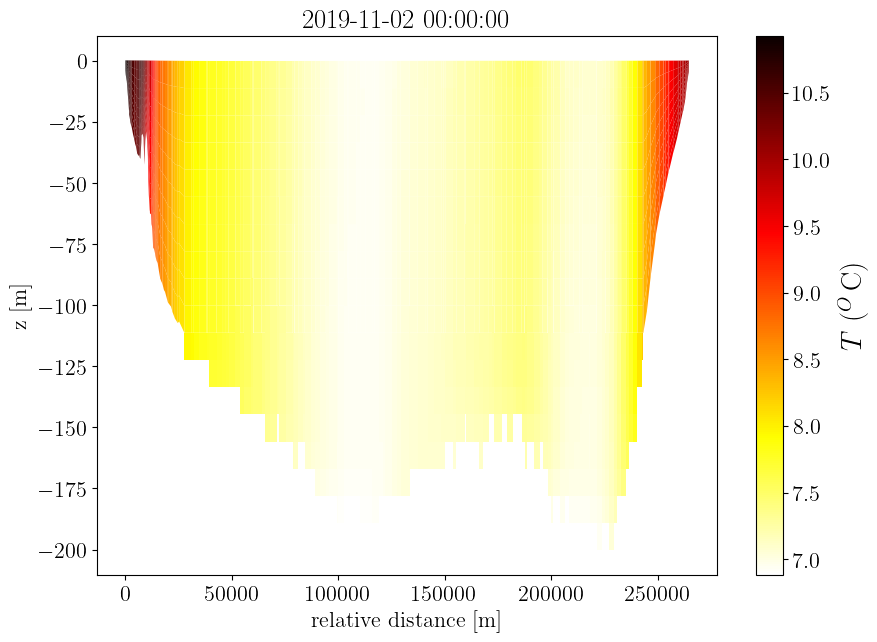

In [53]:
tmag = da_t[73]
tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-00-00_T-slice.jpeg");

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
C:\Users\byy\AppData\Local\Temp\ipykernel_7400\751389086.py:2: SyntaxWarning: invalid escape sequence '\h'
  tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-12-00_T-slice.jpeg");


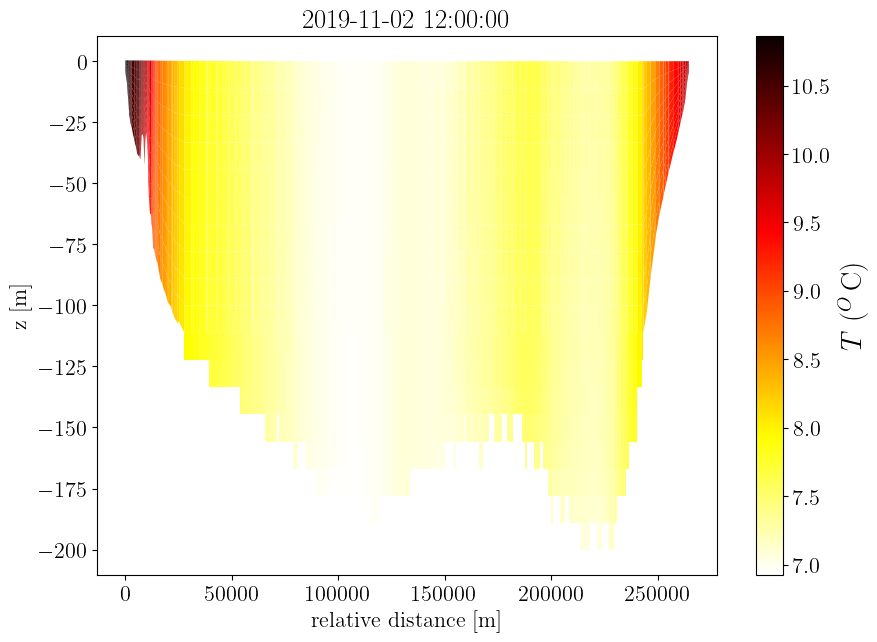

In [54]:
tmag = da_t[85]
tmag.plot(vmin=0.0, vmax=1.0, levels=19, plot_type='shaded', cmap='hot_r', figsize=(10,7), label='\huge $T\ (^O\, \mathrm{C})$', save_str="./3D_FMSW/3D_baroclinic_FMSW_largerWC/2019-11-2-12-00_T-slice.jpeg");